http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,-0.852004,-1.772950,-0.347533,0.415574
2013-01-02,2.390285,1.342005,-0.710102,0.852603
2013-01-03,0.629937,-0.217181,0.241994,-0.774672
2013-01-04,-0.177879,-0.984105,-0.075045,1.584944
2013-01-05,0.119051,-0.078037,0.496209,0.961711
2013-01-06,1.864454,-0.759686,-1.297968,0.122252


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.852004,-1.772950,-0.347533,0.415574
2013-01-02,2.390285,1.342005,-0.710102,0.852603
2013-01-03,0.629937,-0.217181,0.241994,-0.774672
2013-01-04,-0.177879,-0.984105,-0.075045,1.584944
2013-01-05,0.119051,-0.078037,0.496209,0.961711


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.177879,-0.984105,-0.075045,1.584944
2013-01-05,0.119051,-0.078037,0.496209,0.961711
2013-01-06,1.864454,-0.759686,-1.297968,0.122252


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.8520039 , -1.77295042, -0.34753287,  0.41557426],
       [ 2.39028486,  1.34200512, -0.71010225,  0.85260292],
       [ 0.62993655, -0.21718089,  0.24199425, -0.7746717 ],
       [-0.17787922, -0.98410464, -0.0750453 ,  1.5849445 ],
       [ 0.11905061, -0.07803688,  0.49620867,  0.96171068],
       [ 1.86445413, -0.75968639, -1.29796779,  0.12225239]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.662307,-0.411659,-0.282074,0.527069
std,1.243084,1.051322,0.654640,0.810533
min,-0.852004,-1.772950,-1.297968,-0.774672
25%,-0.103647,-0.928000,-0.619460,0.195583
50%,0.374494,-0.488434,-0.211289,0.634089
75%,1.555825,-0.112823,0.162734,0.934434
max,2.390285,1.342005,0.496209,1.584944


Transposing your data

In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.852004,2.390285,0.629937,-0.177879,0.119051,1.864454
B,-1.772950,1.342005,-0.217181,-0.984105,-0.078037,-0.759686
C,-0.347533,-0.710102,0.241994,-0.075045,0.496209,-1.297968
D,0.415574,0.852603,-0.774672,1.584944,0.961711,0.122252


Sorting by an axis

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.415574,-0.347533,-1.772950,-0.852004
2013-01-02,0.852603,-0.710102,1.342005,2.390285
2013-01-03,-0.774672,0.241994,-0.217181,0.629937
2013-01-04,1.584944,-0.075045,-0.984105,-0.177879
2013-01-05,0.961711,0.496209,-0.078037,0.119051
2013-01-06,0.122252,-1.297968,-0.759686,1.864454


Sorting by value

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.852004,-1.772950,-0.347533,0.415574
2013-01-04,-0.177879,-0.984105,-0.075045,1.584944
2013-01-06,1.864454,-0.759686,-1.297968,0.122252
2013-01-03,0.629937,-0.217181,0.241994,-0.774672
2013-01-05,0.119051,-0.078037,0.496209,0.961711
2013-01-02,2.390285,1.342005,-0.710102,0.852603


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01   -0.852004
2013-01-02    2.390285
2013-01-03    0.629937
2013-01-04   -0.177879
2013-01-05    0.119051
2013-01-06    1.864454
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.852004,-1.772950,-0.347533,0.415574
2013-01-02,2.390285,1.342005,-0.710102,0.852603
2013-01-03,0.629937,-0.217181,0.241994,-0.774672


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,2.390285,1.342005,-0.710102,0.852603
2013-01-03,0.629937,-0.217181,0.241994,-0.774672
2013-01-04,-0.177879,-0.984105,-0.075045,1.584944


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A   -0.852004
B   -1.772950
C   -0.347533
D    0.415574
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.852004,-1.772950
2013-01-02,2.390285,1.342005
2013-01-03,0.629937,-0.217181
2013-01-04,-0.177879,-0.984105
2013-01-05,0.119051,-0.078037
2013-01-06,1.864454,-0.759686


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,2.390285,1.342005
2013-01-03,0.629937,-0.217181
2013-01-04,-0.177879,-0.984105


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A    2.390285
B    1.342005
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

-0.8520038954602024

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -0.177879
B   -0.984105
C   -0.075045
D    1.584944
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.177879,-0.984105
2013-01-05,0.119051,-0.078037


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,2.390285,-0.710102
2013-01-03,0.629937,0.241994
2013-01-05,0.119051,0.496209


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,2.390285,1.342005,-0.710102,0.852603
2013-01-03,0.629937,-0.217181,0.241994,-0.774672


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.772950,-0.347533
2013-01-02,1.342005,-0.710102
2013-01-03,-0.217181,0.241994
2013-01-04,-0.984105,-0.075045
2013-01-05,-0.078037,0.496209
2013-01-06,-0.759686,-1.297968


For getting a value explicitly

In [35]:
df.iloc[1,1]

1.3420051152293717

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

1.3420051152293717

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-02,2.390285,1.342005,-0.710102,0.852603
2013-01-03,0.629937,-0.217181,0.241994,-0.774672
2013-01-05,0.119051,-0.078037,0.496209,0.961711
2013-01-06,1.864454,-0.759686,-1.297968,0.122252


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.415574
2013-01-02,2.390285,1.342005,NaN,0.852603
2013-01-03,0.629937,NaN,0.241994,NaN
2013-01-04,NaN,NaN,NaN,1.584944
2013-01-05,0.119051,NaN,0.496209,0.961711
2013-01-06,1.864454,NaN,NaN,0.122252


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.852004,-1.772950,-0.347533,0.415574,one
2013-01-02,2.390285,1.342005,-0.710102,0.852603,one
2013-01-03,0.629937,-0.217181,0.241994,-0.774672,two
2013-01-04,-0.177879,-0.984105,-0.075045,1.584944,three
2013-01-05,0.119051,-0.078037,0.496209,0.961711,four
2013-01-06,1.864454,-0.759686,-1.297968,0.122252,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.629937,-0.217181,0.241994,-0.774672,two
2013-01-05,0.119051,-0.078037,0.496209,0.961711,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.347533,5,NaN
2013-01-02,2.390285,1.342005,-0.710102,5,1.0
2013-01-03,0.629937,-0.217181,0.241994,5,2.0
2013-01-04,-0.177879,-0.984105,-0.075045,5,3.0
2013-01-05,0.119051,-0.078037,0.496209,5,4.0
2013-01-06,1.864454,-0.759686,-1.297968,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.347533,-5,NaN
2013-01-02,-2.390285,-1.342005,-0.710102,-5,-1.0
2013-01-03,-0.629937,-0.217181,-0.241994,-5,-2.0
2013-01-04,-0.177879,-0.984105,-0.075045,-5,-3.0
2013-01-05,-0.119051,-0.078037,-0.496209,-5,-4.0
2013-01-06,-1.864454,-0.759686,-1.297968,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.347533,5,NaN,1.0
2013-01-02,2.390285,1.342005,-0.710102,5,1.0,1.0
2013-01-03,0.629937,-0.217181,0.241994,5,2.0,NaN
2013-01-04,-0.177879,-0.984105,-0.075045,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,2.390285,1.342005,-0.710102,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.347533,5,5.0,1.0
2013-01-02,2.390285,1.342005,-0.710102,5,1.0,1.0
2013-01-03,0.629937,-0.217181,0.241994,5,2.0,5.0
2013-01-04,-0.177879,-0.984105,-0.075045,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A    0.804308
B   -0.116167
C   -0.282074
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    1.163117
2013-01-02    1.804438
2013-01-03    1.530950
2013-01-04    1.352594
2013-01-05    1.907444
2013-01-06    1.961360
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.370063,-1.217181,-0.758006,4.0,1.0
2013-01-04,-3.177879,-3.984105,-3.075045,2.0,0.0
2013-01-05,-4.880949,-5.078037,-4.503791,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.347533,5,NaN
2013-01-02,2.390285,1.342005,-1.057635,10,1.0
2013-01-03,3.020221,1.124824,-0.815641,15,3.0
2013-01-04,2.842342,0.140720,-0.890686,20,6.0
2013-01-05,2.961393,0.062683,-0.394477,25,10.0
2013-01-06,4.825847,-0.697004,-1.692445,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    2.568164
B    2.326110
C    1.794176
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    4
1    6
2    2
3    6
4    6
5    1
6    1
7    5
8    1
9    4
dtype: int64

In [68]:
s.value_counts()

6    3
1    3
4    2
5    1
2    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,0.080258,0.517991,0.184535,-0.229130
1,-0.818265,0.972547,0.864870,1.440621
2,-1.300657,0.346332,-0.024876,-0.214193
3,0.586281,2.245024,-0.260912,-0.355169
4,-0.473643,-1.397932,1.751530,-1.240523
5,0.512815,-0.394396,-0.023948,-2.858004
6,0.754665,-0.060563,1.286745,-0.952491
7,-1.416486,-0.075174,-0.207231,-0.414474
8,1.545300,-0.671965,-0.268014,0.242322
9,-1.722623,1.956601,-0.040314,0.842481


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,0.080258,0.517991,0.184535,-0.229130
1,-0.818265,0.972547,0.864870,1.440621
2,-1.300657,0.346332,-0.024876,-0.214193
3,0.586281,2.245024,-0.260912,-0.355169
4,-0.473643,-1.397932,1.751530,-1.240523
5,0.512815,-0.394396,-0.023948,-2.858004
6,0.754665,-0.060563,1.286745,-0.952491
7,-1.416486,-0.075174,-0.207231,-0.414474
8,1.545300,-0.671965,-0.268014,0.242322
9,-1.722623,1.956601,-0.040314,0.842481


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,0.227381,0.412061,1.832079,0.920759
1,0.274621,1.436685,0.060053,-2.364778
2,0.857546,-0.829779,-1.061852,2.322578
3,0.059739,-1.430454,-0.722318,-1.822181
4,-0.754905,-1.273505,1.734318,-0.102090
5,0.122386,0.854386,2.122306,1.434713
6,-1.265022,-0.041240,1.183860,0.575984
7,-0.221363,-0.572409,-0.419359,0.287000


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.227381,0.412061,1.832079,0.920759
1,0.274621,1.436685,0.060053,-2.364778
2,0.857546,-0.829779,-1.061852,2.322578
3,0.059739,-1.430454,-0.722318,-1.822181
4,-0.754905,-1.273505,1.734318,-0.102090
5,0.122386,0.854386,2.122306,1.434713
6,-1.265022,-0.041240,1.183860,0.575984
7,-0.221363,-0.572409,-0.419359,0.287000
8,0.059739,-1.430454,-0.722318,-1.822181


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,-0.641865,0.444745
1,bar,one,1.807100,-0.462973
2,foo,two,0.468877,0.810900
3,bar,three,-1.654043,0.387279
4,foo,two,0.313272,-1.197473
5,bar,two,0.450078,-0.367033
6,foo,one,-0.368758,-1.807152
7,foo,three,-0.021739,-0.766896


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,0.603135,-0.442727
foo,-0.250213,-2.515877


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.807100 -0.462973
    three -1.654043  0.387279
    two    0.450078 -0.367033
foo one   -1.010623 -1.362407
    three -0.021739 -0.766896
    two    0.782149 -0.386573

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one     0.480486  1.332039
      two    -0.729773 -0.309203
baz   one    -0.796705 -0.648765
      two    -0.825127  1.265742

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A    0.480486
               B    1.332039
       two     A   -0.729773
               B   -0.309203
baz    one     A   -0.796705
               B   -0.648765
       two     A   -0.825127
               B    1.265742
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one     0.480486  1.332039
      two    -0.729773 -0.309203
baz   one    -0.796705 -0.648765
      two    -0.825127  1.265742

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.480486 -0.729773
      B  1.332039 -0.309203
baz   A -0.796705 -0.825127
      B -0.648765  1.265742

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.480486 -0.796705
       B  1.332039 -0.648765
two    A -0.729773 -0.825127
       B -0.309203  1.265742

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,-1.278624,-0.970015
1,one,B,foo,0.143083,-0.621493
2,two,C,foo,0.510772,0.464056
3,three,A,bar,0.306508,0.857512
4,one,B,bar,0.212083,0.603306
5,one,C,bar,-0.979558,1.704986
6,two,A,foo,-0.527566,0.261279
7,three,B,foo,-0.259669,-0.551814
8,one,C,foo,-0.392469,2.103176
9,one,A,bar,-1.970813,0.118496


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.970813 -1.278624
      B  0.212083  0.143083
      C -0.979558 -0.392469
three A  0.306508       NaN
      B       NaN -0.259669
      C  1.215244       NaN
two   A       NaN -0.527566
      B  0.448690       NaN
      C       NaN  0.510772

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    24304
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06    1.220373
2012-03-07    0.882172
2012-03-08   -0.338728
2012-03-09   -0.172903
2012-03-10   -0.668762
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00    1.220373
2012-03-07 00:00:00+00:00    0.882172
2012-03-08 00:00:00+00:00   -0.338728
2012-03-09 00:00:00+00:00   -0.172903
2012-03-10 00:00:00+00:00   -0.668762
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.220373
2012-03-06 19:00:00-05:00    0.882172
2012-03-07 19:00:00-05:00   -0.338728
2012-03-08 19:00:00-05:00   -0.172903
2012-03-09 19:00:00-05:00   -0.668762
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.518571
2012-02-29    0.856500
2012-03-31   -1.192864
2012-04-30   -0.348782
2012-05-31    1.335168
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.518571
2012-02    0.856500
2012-03   -1.192864
2012-04   -0.348782
2012-05    1.335168
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.518571
2012-02-01    0.856500
2012-03-01   -1.192864
2012-04-01   -0.348782
2012-05-01    1.335168
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00    1.361677
1990-06-01 09:00    0.300933
1990-09-01 09:00   -0.368226
1990-12-01 09:00   -0.228246
1991-03-01 09:00   -1.466518
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

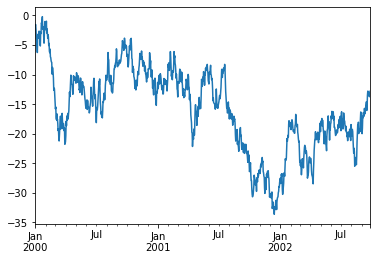

In [130]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

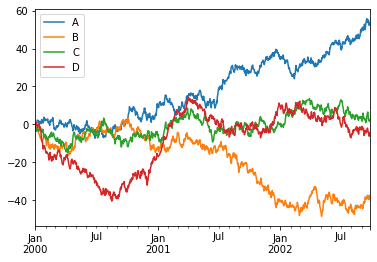

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.532970,-1.048090,-1.100818,-0.349288
1,2000-01-02,0.008218,-3.556110,-1.206487,-0.065181
2,2000-01-03,-0.119797,-3.456712,-1.934457,-0.368302
3,2000-01-04,-0.691252,-3.293814,-2.728450,0.844262
4,2000-01-05,0.666505,-3.559666,-3.707462,-0.270412
...,...,...,...,...,...
995,2002-09-22,53.038160,-39.786774,2.431359,-4.955666
996,2002-09-23,52.259025,-39.046719,1.749133,-6.300153
997,2002-09-24,52.935552,-38.918535,2.589405,-5.695147
998,2002-09-25,53.806553,-37.840518,1.526988,-5.282115


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.532970,-1.048090,-1.100818,-0.349288
2000-01-02,0.008218,-3.556110,-1.206487,-0.065181
2000-01-03,-0.119797,-3.456712,-1.934457,-0.368302
2000-01-04,-0.691252,-3.293814,-2.728450,0.844262
2000-01-05,0.666505,-3.559666,-3.707462,-0.270412
...,...,...,...,...
2002-09-22,53.038160,-39.786774,2.431359,-4.955666
2002-09-23,52.259025,-39.046719,1.749133,-6.300153
2002-09-24,52.935552,-38.918535,2.589405,-5.695147
2002-09-25,53.806553,-37.840518,1.526988,-5.282115


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.532970,-1.048090,-1.100818,-0.349288
1,2000-01-02,0.008218,-3.556110,-1.206487,-0.065181
2,2000-01-03,-0.119797,-3.456712,-1.934457,-0.368302
3,2000-01-04,-0.691252,-3.293814,-2.728450,0.844262
4,2000-01-05,0.666505,-3.559666,-3.707462,-0.270412
...,...,...,...,...,...
995,2002-09-22,53.038160,-39.786774,2.431359,-4.955666
996,2002-09-23,52.259025,-39.046719,1.749133,-6.300153
997,2002-09-24,52.935552,-38.918535,2.589405,-5.695147
998,2002-09-25,53.806553,-37.840518,1.526988,-5.282115


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.